<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_training_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/MyDrive"

!git clone https://github.com/ultralytics/yolov5.git
!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [4]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [5]:
!curl -L "https://app.roboflow.com/ds/Op2E9U1g2L?key=98qFPlxNBk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/Siam119_jpg.rf.0c03d464717e92a74392113bd9900dd2.txt  
  inflating: train/labels/Siam119_jpg.rf.4c9b29b2429bc47785679b64ed8d2f3e.txt  
  inflating: train/labels/Siam119_jpg.rf.9f07137424d70a7697e23a7a9e2235e9.txt  
  inflating: train/labels/Siam11_jpeg.rf.0d8585bd6ad10598dffd0505abb055a0.txt  
  inflating: train/labels/Siam11_jpeg.rf.3089e6de1d235ba38853959e9b87b4d2.txt  
  inflating: train/labels/Siam11_jpeg.rf.634a7d87d833c0392cc80e6e335c420e.txt  
  inflating: train/labels/Siam121_jpg.rf.7f5f9a040298296da9af926a1100ff87.txt  
  inflating: train/labels/Siam121_jpg.rf.7f70790b4ac525c7f659ba42480bf7d4.txt  
 extracting: train/labels/Siam121_jpg.rf.8e941ef95ed54a3383e411176854ade4.txt  
  inflating: train/labels/Siam122_jpg.rf.7a153df2ed3052cfca1bee70e85670f5.txt  
  inflating: train/labels/Siam122_jpg.rf.8f6a0712046d0fd8aaea2370b9b20892.txt  
 extracting: train/labels/Siam122_jpg.rf.eb596d9900587f14b285e785e7a59da5.txt  
  in

In [6]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/dataset/train/images/*.jpg') + glob('/content/drive/MyDrive/dataset/train/images/*.jpeg') + glob('/content/drive/MyDrive/dataset/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/dataset/valid/images/*.jpg') + glob('/content/drive/MyDrive/dataset/valid/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/dataset/test/images/*.jpg') + glob('/content/drive/MyDrive/dataset/test/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/test/images/*.png')


# txt 파일에 write
with open('/content/drive/MyDrive/dataset/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [8]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
	data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/dataset/valid.txt'
data['test'] = '/content/drive/MyDrive/dataset/test.txt'

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
	yaml.dump(data, f)

{'names': ['Bichon', 'Chihuahua', 'Jindo', 'Maltese', 'Pomeranian', 'Poodle', 'Pug', 'Retriever', 'Shihtzu', 'YorkshireTerrier', 'persian', 'ragdoll', 'russianblue', 'scottishfold', 'siam', 'turkishangora'], 'nc': 16, 'roboflow': {'license': 'CC BY 4.0', 'project': 'cat-and-dog-breeds-fgmzk', 'url': 'https://universe.roboflow.com/petective/cat-and-dog-breeds-fgmzk/dataset/19', 'version': 19, 'workspace': 'petective'}, 'test': '/content/drive/MyDrive/dataset/test.txt', 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/valid.txt'}


In [9]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [11]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/dataset/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_11

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  with torch.cuda.amp.autocast(amp):
      46/49      4.71G    0.01975    0.01014     0.0126         34        640:   3% 18/624 [00:01<00:57, 10.55it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      4.71G    0.01971    0.01026    0.01334         46        640:   3% 20/624 [00:01<00:59, 10.16it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      46/49      4.71G    0.01988     0.0103    0.01296         39        640:   3% 20/624 [00:01<00:59, 10.16it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with 

**ㄴ dog_breeds_training_11로 파일명 변경**

In [14]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/cat_testimage/RagdollTest1.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/cat_testimage/RagdollTest1.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/cat_testimage/RagdollTest1.jpeg: 640x448 1 ragdoll, 38.6ms
Speed: 0.8ms pre-process, 38.6ms inference, 514.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

In [15]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/cat_testimage/RagdollTest2.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/cat_testimage/RagdollTest2.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/cat_testimage/RagdollTest2.jpeg: 640x640 1 ragdoll, 7.7ms
Speed: 0.8ms pre-process, 7.7ms inference, 604.6ms NMS per image at shape (1, 3, 64

In [16]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/cat_testimage/RagdollTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/cat_testimage/RagdollTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/cat_testimage/RagdollTest3.jpeg: 640x480 1 ragdoll, 38.7ms
Speed: 0.7ms pre-process, 38.7ms inference, 550.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

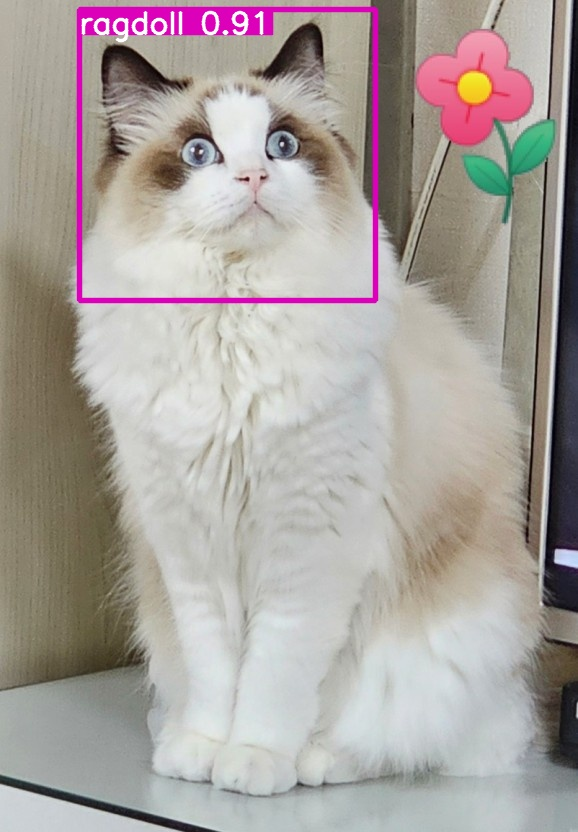

In [17]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp3/RagdollTest1.jpeg')
cv2_imshow(img)

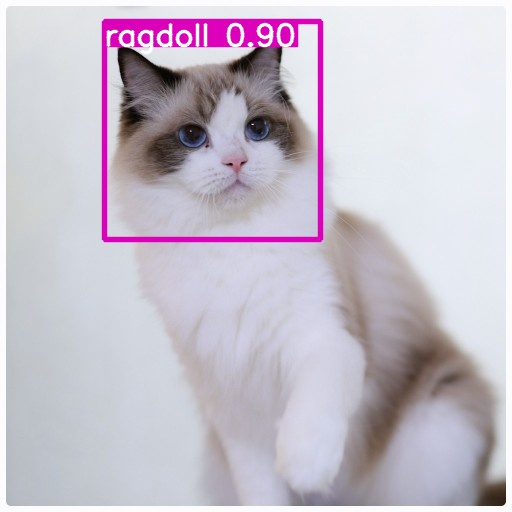

In [18]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp4/RagdollTest2.jpeg')
cv2_imshow(img)

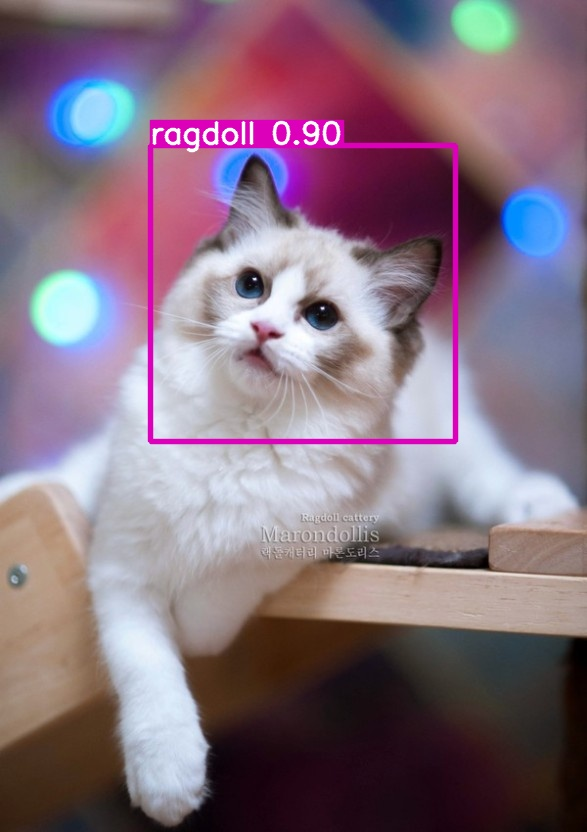

In [19]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp5/RagdollTest3.jpeg')
cv2_imshow(img)

In [20]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PugTest1.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PugTest1.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/PugTest1.jpeg: 480x640 1 Pug, 38.3ms
Speed: 0.7ms pre-process, 38.3ms inference, 528.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


In [21]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PugTest2.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PugTest2.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PugTest2.jpeg: 448x640 1 Pug, 39.9ms
Speed: 0.7ms pre-process, 39.9ms inference, 618.1ms NMS per image at shape (1, 3, 640, 640)
Re

In [22]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PugTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_11/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PugTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PugTest3.jpeg: 640x640 1 Pug, 7.1ms
Speed: 0.7ms pre-process, 7.1ms inference, 599.4ms NMS per image at shape (1, 3, 640, 640)
Resu

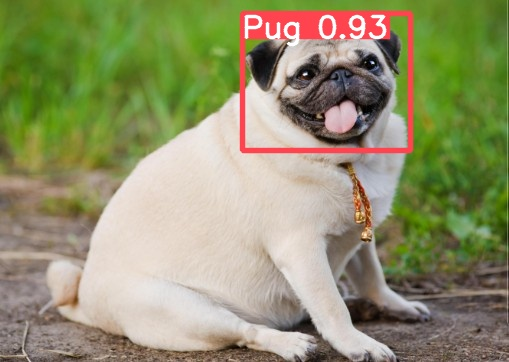

In [23]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp6/PugTest1.jpeg')
cv2_imshow(img)

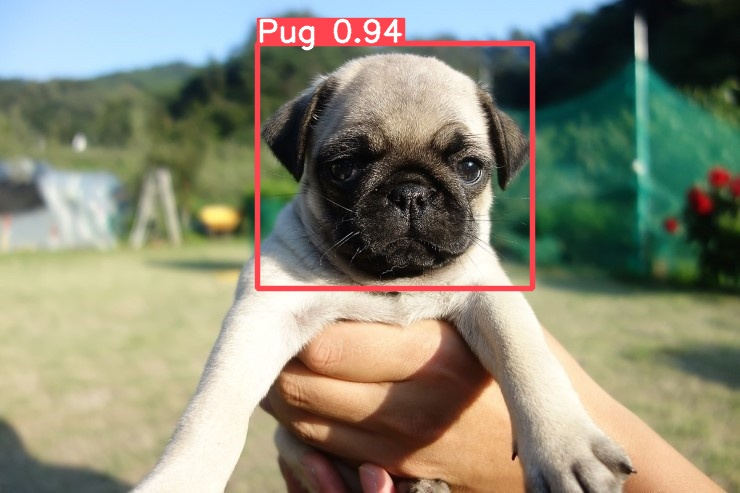

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp7/PugTest2.jpeg')
cv2_imshow(img)

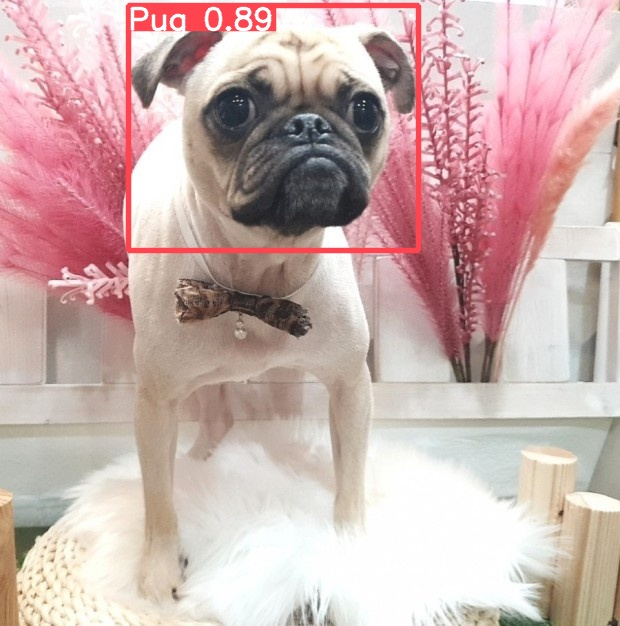

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp8/PugTest3.jpeg')
cv2_imshow(img)